In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [2]:
cd Dropbox/Portfolio/DataScience-Portfolio/Titanic

C:\Users\Sole\Dropbox\Portfolio\DataScience-Portfolio\Titanic


In [3]:
# load data and have a quick look
titanic = pd.read_csv('train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# info about the type of our variables and some insight into NaN
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
# rows and columns
titanic.shape

(891, 12)

In [6]:
# some basic stats
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# more specifically, how many NaNs
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature extraction for future analysis
### Additional column specifying female, male or child

In [8]:
# label minors as child, and remaining people as female or male
def male_female_child(passenger):
    # take the age and sex
    age, sex = passenger
    
    # compare age, return child if under 16, otherwise leave sex
    if age < 16:
        return 'child'
    else:
        return sex

In [9]:
# new column called person specifying if the person was female, male or child
titanic['Person'] = titanic[['Age', 'Sex']].apply(male_female_child, axis = 1)
titanic['Person'][5:10]

5      male
6      male
7     child
8    female
9     child
Name: Person, dtype: object

## Extracting the title from the name (helps infer age)

Inspired by a kaggle [script](https://www.kaggle.com/c/titanic/prospector#1294)

In [10]:
def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'

In [11]:
titanic['Title'] = titanic['Name'].apply(get_title)
titanic['Title'][5:10]

5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

### Extracting the Deck from the Cabin

In [12]:
# the usual way to check if a number is NaN is to check if it is equal to itself :) super-cool
def isNaN(num):
    return num != num

# get the first letter (the number of the cabin is irrelevant as the letter specifies the location in the boat)
def get_cabin(cabin):
    if not isNaN(cabin):
        return cabin[0]
    else:
        return np.nan

In [13]:
titanic['CabinLetter'] = titanic['Cabin'].apply(get_cabin)
titanic['CabinLetter'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: CabinLetter, dtype: object

### Defining whether passenger was with family

In [14]:
titanic['Alone'] = titanic.Parch + titanic.SibSp
titanic['Alone'].loc[titanic['Alone'] > 0] = 'With Family'
titanic['Alone'].loc[titanic['Alone'] == 0] = 'Alone'
titanic.Alone.head()

C:\Users\Sole\Anaconda3\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0    With Family
1    With Family
2          Alone
3    With Family
4          Alone
Name: Alone, dtype: object

## Exploratory Data Analysis

### Who were the people on board of the Titanic?

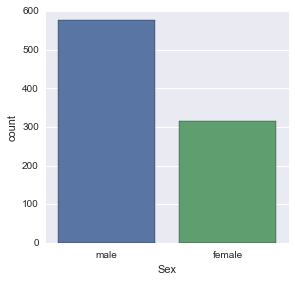

In [15]:
# check gender
g = sns.factorplot('Sex', data = titanic, kind = 'count')

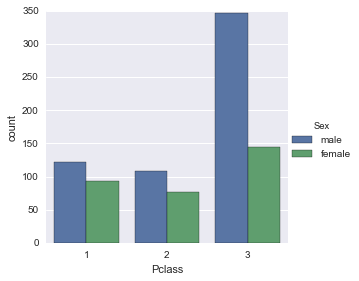

In [16]:
# gender segregated by class
sns.factorplot('Pclass', data = titanic, hue = 'Sex', kind = 'count')

There was a big proportion of men in class 3. Why would that be?

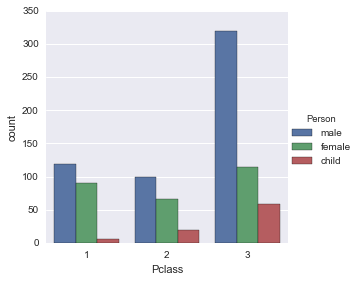

In [17]:
# person segregated by class (note children in lower classes but not many in class 1)
sns.factorplot('Pclass', data = titanic, hue = 'Person', kind = 'count')

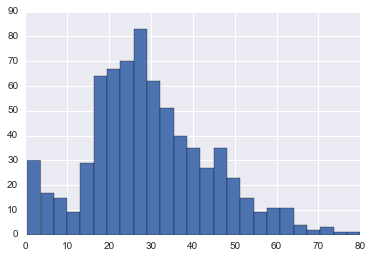

In [18]:
# distribution of age on board
titanic['Age'].hist(bins = 25)

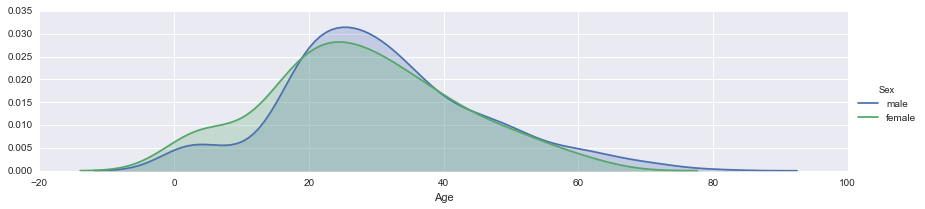

In [19]:
# age segregated by gender
fig = sns.FacetGrid(titanic, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()

In [20]:
# Number of male, female and children
titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

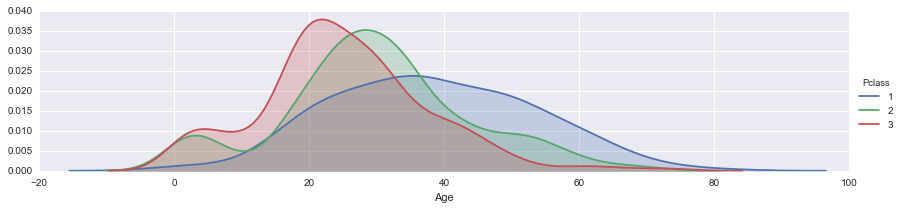

In [21]:
# age segregated by class
fig = sns.FacetGrid(titanic, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()

Note the peak over 0 age for classes 2 and 3, which coincides with the classes that had children. Class 1 did not have a lot of children, unsurprisingly. Note also, that older people were high class

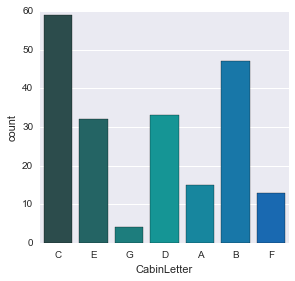

In [22]:
# Number of people on each deck
sns.factorplot('CabinLetter', data = titanic[titanic.CabinLetter != 'T'], kind = 'count', palette = 'winter_d')

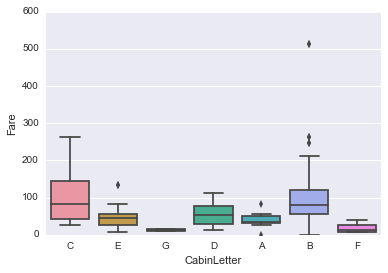

In [23]:
# Fare value per deck. I would have expected higher fares where there is less people, but not according to the plot below
sns.boxplot(x = 'CabinLetter', y = 'Fare', data = titanic[titanic.CabinLetter !=  'T'])

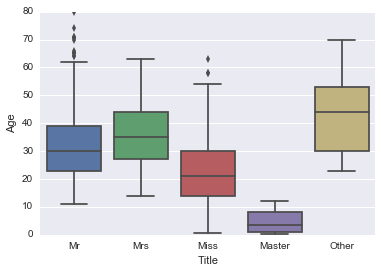

In [24]:
# Title indicates the age of the passenger
sns.boxplot(x = 'Title', y = 'Age', data = titanic)

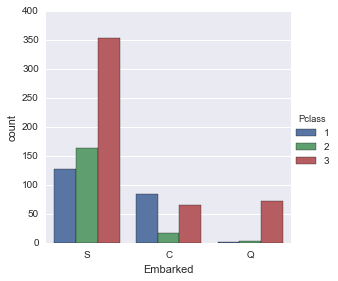

In [25]:
# where did people from different classes get on board?
sns.factorplot('Embarked', data = titanic, hue= 'Pclass', kind = 'count')

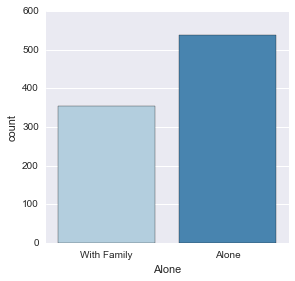

In [26]:
# most people where Alone, as in with no family
sns.factorplot('Alone', data = titanic, kind = 'count', palette = 'Blues')

This concludes the exploration about the passenger on board of the titanic. In the next script I will evaluate the factors that affected survival.